#### Análisis exploratorio de datos sobre la violencia criminal en Honduras

In [1]:
# Cargamos las librerias necesarias para realizar el análisis exploratorio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Cargamos la base de datos general de UNOCD y se realiza una primera revision del dataset

datos = pd.read_excel('datasets/data_cts_intentional_homicide.xlsx', skiprows=2)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118401 entries, 0 to 118400
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Iso3_code            118401 non-null  object 
 1   Country              118397 non-null  object 
 2   Region               118397 non-null  object 
 3   Subregion            118397 non-null  object 
 4   Indicator            118401 non-null  object 
 5   Dimension            118401 non-null  object 
 6   Category             118401 non-null  object 
 7   Sex                  118401 non-null  object 
 8   Age                  118401 non-null  object 
 9   Year                 118401 non-null  int64  
 10  Unit of measurement  118401 non-null  object 
 11  VALUE                118401 non-null  float64
 12  Source               118401 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.7+ MB


In [3]:
print(datos['Subregion'].value_counts())


Subregion
Latin America and the Caribbean    38929
Southern Europe                    16831
Northern Europe                    14935
Western Europe                      9915
Eastern Europe                      9402
Western Asia                        6089
Eastern Asia                        4598
Northern America                    4544
Sub-Saharan Africa                  3052
Southern Asia                       2396
Northern Africa                     2100
Australia and New Zealand           2001
South-eastern Asia                  1405
Central Asia                         946
Polynesia                            200
Melanesia                            142
Africa                               138
Americas                             138
Asia                                 138
Europe                               138
Oceania                              138
World                                138
Micronesia                            84
Name: count, dtype: int64


In [4]:
print(datos['Indicator'].value_counts())

Indicator
Victims of intentional homicide                        90519
Persons arrested/suspected for intentional homicide    18824
Victims of intentional homicide – City-level data       4276
Persons convicted for intentional homicide              2612
Death due to intentional homicide in prison             1342
Victims of Intentional Homicide - Regional Estimate      828
Name: count, dtype: int64


In [5]:
print(datos['Dimension'].value_counts())

Dimension
Total                             65286
by relationship to perpetrator    22644
by situational context            13882
by mechanisms                      9304
by location                        4276
by citizenship                     3009
Name: count, dtype: int64


In [6]:
print(datos['Category'].value_counts())

Category
Total                                                  65286
Intimate partner or family member                       6100
Intimate partner or family member: Intimate partner     4622
Other criminal activities                               4006
Intimate partner or family member: Family member        3300
Organized criminal groups or gangs                      3086
Other Perpetrator known to the victim                   2924
Perpetrator to victim relationship unknown              2894
Perpetrator unknown to the victim                       2804
Interpersonal homicide                                  2154
Firearms or explosives - firearms                       2118
Another weapon - sharp object                           2062
2nd largest city                                        1908
Unspecified means                                       1752
Unknown types of homicide                               1750
National citizens                                       1559
Socio-political

In [7]:
print(datos['Sex'].value_counts())

Sex
Male      40025
Female    39338
Total     39038
Name: count, dtype: int64


In [8]:
print(datos['Age'].value_counts())


Age
Total           77625
30-44            6572
60 and older     6524
45-59            6504
25-29            4862
20-24            3892
18-19            3772
0-9              3372
15 -17           1948
10 -14           1697
Unknown          1633
Name: count, dtype: int64


In [9]:
print(datos['Unit of measurement'].value_counts())

Unit of measurement
Counts                         63347
Rate per 100,000 population    55054
Name: count, dtype: int64


In [10]:
latam = datos[
    (datos['Subregion'] == 'Latin America and the Caribbean') &
    (datos['Indicator'] == 'Victims of intentional homicide') &
    (datos['Dimension'] == 'Total') &
    (datos['Category'] == 'Total') &
    (datos['Sex'] == 'Total') &
    (datos['Age'] == 'Total') &
    (datos['Unit of measurement'] == 'Rate per 100,000 population') &
    (datos['Year'] >= 2002) &
    (datos['Year'] <= 2022)
]

In [11]:
latam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 64638 to 67542
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iso3_code            765 non-null    object 
 1   Country              765 non-null    object 
 2   Region               765 non-null    object 
 3   Subregion            765 non-null    object 
 4   Indicator            765 non-null    object 
 5   Dimension            765 non-null    object 
 6   Category             765 non-null    object 
 7   Sex                  765 non-null    object 
 8   Age                  765 non-null    object 
 9   Year                 765 non-null    int64  
 10  Unit of measurement  765 non-null    object 
 11  VALUE                765 non-null    float64
 12  Source               765 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 83.7+ KB


In [12]:
latam_pivot = latam.pivot_table(index='Year', columns='Country', values='VALUE')
latam_pivot.index

Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='Year')

In [13]:
print(latam_pivot.columns)

Index(['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas',
       'Barbados', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'French Guiana', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique',
       'Mexico', 'Montserrat', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Martin (French Part)', 'Saint Vincent and the Grenadines',
       'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands',
       'United States Virgin Islands', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'],
      dtype='object', name='Country')


In [14]:
print(latam_pivot.head())

Country   Anguilla  Antigua and Barbuda  Argentina     Aruba    Bahamas  \
Year                                                                      
2002     17.113764             6.490809   9.387486  5.471747  15.680882   
2003     16.842814             6.419804   7.721680  4.333225  14.897912   
2004      8.286721             5.081333   6.023302  2.145635  12.949479   
2005      0.000000             3.768347   5.604742  6.367399  15.120938   
2006     40.097839            13.646965   5.327833  5.241502  17.509867   

Country   Barbados     Belize  Bolivia (Plurinational State of)     Brazil  \
Year                                                                         
2002      9.464391  33.983247                               NaN  27.848196   
2003     12.416471  25.399955                               NaN  28.271088   
2004      8.230514  29.077418                               NaN  26.491836   
2005     10.792465  28.956442                               NaN  25.769392   
2006  

In [15]:
# Se cálcula la matriz de correlación (método de Pearson) para los países de Latinoamérica y se filtra el resultado de Honduras

correlacion= latam_pivot.corr(method='pearson', min_periods=1, numeric_only=False)
honduras = correlacion['Honduras']

print(honduras)

Country
Anguilla                             -0.204726
Antigua and Barbuda                  -0.067901
Argentina                             0.469788
Aruba                                -0.336482
Bahamas                               0.329894
Barbados                             -0.544780
Belize                                0.454652
Bolivia (Plurinational State of)      0.464320
Brazil                                0.494816
British Virgin Islands               -0.024971
Cayman Islands                        0.608545
Chile                                -0.671494
Colombia                              0.188374
Costa Rica                           -0.167203
Cuba                                  0.104456
Curaçao                               0.937806
Dominica                             -0.302764
Dominican Republic                    0.601411
Ecuador                               0.107620
El Salvador                           0.349908
French Guiana                         0.018144
Grena

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr

In [16]:
# Se convierte el objeto series en un dataframe para poder ordenar los valores

honduras = pd.DataFrame(honduras)
honduras = honduras.reset_index()
honduras.columns = ['País', 'Correlación']
honduras = honduras[honduras['País'] != 'Honduras']
honduras = honduras.sort_values(by='Correlación', ascending=False)
print(honduras)

                                  País  Correlación
15                             Curaçao     0.937806
35                         Puerto Rico     0.833888
32                              Panama     0.722674
43        United States Virgin Islands     0.641193
45  Venezuela (Bolivarian Republic of)     0.615832
10                      Cayman Islands     0.608545
17                  Dominican Republic     0.601411
36               Saint Kitts and Nevis     0.498324
8                               Brazil     0.494816
2                            Argentina     0.469788
7     Bolivia (Plurinational State of)     0.464320
6                               Belize     0.454652
23                           Guatemala     0.446604
19                         El Salvador     0.349908
4                              Bahamas     0.329894
24                              Guyana     0.287841
22                          Guadeloupe     0.285062
30                          Montserrat     0.280613
31          

In [17]:
# Se filtran los datos para obtener los paises con una correlación mayor a 0.5 o menor a -0.5 (positiva fuerte o negativa fuerte)

corr_true_honduras = honduras[(honduras['Correlación'] >= 0.5) | (honduras['Correlación'] <= -0.5)]

In [18]:
print(corr_true_honduras)

                                  País  Correlación
15                             Curaçao     0.937806
35                         Puerto Rico     0.833888
32                              Panama     0.722674
43        United States Virgin Islands     0.641193
45  Venezuela (Bolivarian Republic of)     0.615832
10                      Cayman Islands     0.608545
17                  Dominican Republic     0.601411
34                                Peru    -0.537884
5                             Barbados    -0.544780
42            Turks and Caicos Islands    -0.662215
11                               Chile    -0.671494
28                          Martinique    -0.913985


In [19]:
dispersion = latam_pivot[['Honduras', 'Curaçao', 'Puerto Rico', 'Panama', 'United States Virgin Islands', 'Venezuela (Bolivarian Republic of)', 'Cayman Islands', 'Dominican Republic', 'Peru', 'Barbados', 'Turks and Caicos Islands', 'Chile', 'Martinique']]
dispersion

Country,Honduras,Curaçao,Puerto Rico,Panama,United States Virgin Islands,Venezuela (Bolivarian Republic of),Cayman Islands,Dominican Republic,Peru,Barbados,Turks and Caicos Islands,Chile,Martinique
Year,,,,,,,,,,,,,
2002,52.213199,26.730454,21.518286,12.015298,37.816773,37.809107,0.000000,14.448329,NaN,9.464391,9.710152,NaN,NaN
2003,57.211380,29.071438,21.492138,10.564903,28.658593,43.803846,6.828347,21.178939,NaN,12.416471,0.000000,3.201298,NaN
2004,49.856182,27.370466,22.192057,9.473558,34.311839,36.897080,11.024994,24.591176,NaN,8.230514,NaN,NaN,4.690240
2005,42.950625,17.182925,21.776917,10.986936,34.384540,37.198809,6.411969,25.951124,NaN,10.792465,0.000000,3.523199,4.728168
2006,40.721802,11.802892,20.735048,6.548101,40.018613,45.021640,2.073312,22.952126,NaN,12.962891,NaN,3.573766,5.743539
2007,45.795690,16.919813,20.568217,8.116387,40.101092,47.581566,4.025198,22.325258,NaN,9.215282,7.613392,3.694911,5.738430
2008,55.600020,NaN,23.312091,14.083105,43.006731,52.003843,7.819908,25.007495,NaN,8.433728,7.291952,3.491896,4.242618
2009,64.469663,NaN,25.595617,15.767114,46.834459,49.176642,15.203778,24.496494,NaN,6.931208,6.995820,3.703762,2.753297
2010,74.540895,NaN,27.726661,12.677293,52.675640,45.396016,16.636321,25.193034,NaN,11.262755,NaN,3.148742,NaN


In [ ]:
dispersion = dispersion[['Honduras', 'Puerto Rico', 'Panama', 'Venezuela (Bolivarian Republic of)', 'Dominican Republic', 'Barbados']]
dispersion

Country,Honduras,Puerto Rico,Panama,Venezuela (Bolivarian Republic of),Dominican Republic,Barbados,Chile
Year,,,,,,,
2002,52.213199,21.518286,12.015298,37.809107,14.448329,9.464391,NaN
2003,57.211380,21.492138,10.564903,43.803846,21.178939,12.416471,3.201298
2004,49.856182,22.192057,9.473558,36.897080,24.591176,8.230514,NaN
2005,42.950625,21.776917,10.986936,37.198809,25.951124,10.792465,3.523199
2006,40.721802,20.735048,6.548101,45.021640,22.952126,12.962891,3.573766
2007,45.795690,20.568217,8.116387,47.581566,22.325258,9.215282,3.694911
2008,55.600020,23.312091,14.083105,52.003843,25.007495,8.433728,3.491896
2009,64.469663,25.595617,15.767114,49.176642,24.496494,6.931208,3.703762
2010,74.540895,27.726661,12.677293,45.396016,25.193034,11.262755,3.148742


In [21]:
# Se realizará la tabla de regresión

honduras_regresion = pd.DataFrame({
    'Índice': latam_pivot.index.values, 
    'Honduras': latam_pivot['Honduras'],
    'Puerto Rico': latam_pivot['Puerto Rico'],
    'Panama': latam_pivot['Panama'],
    'Venezuela (Bolivarian Republic of)': latam_pivot['Venezuela (Bolivarian Republic of)'],
    'Dominican Republic': latam_pivot['Dominican Republic'],
    'Barbados': latam_pivot['Barbados'],
    'Chile': latam_pivot['Chile']
})

print(honduras_regresion)

      Índice   Honduras  Puerto Rico     Panama  \
Year                                              
2002    2002  52.213199    21.518286  12.015298   
2003    2003  57.211380    21.492138  10.564903   
2004    2004  49.856182    22.192057   9.473558   
2005    2005  42.950625    21.776917  10.986936   
2006    2006  40.721802    20.735048   6.548101   
2007    2007  45.795690    20.568217   8.116387   
2008    2008  55.600020    23.312091  14.083105   
2009    2009  64.469663    25.595617  15.767114   
2010    2010  74.540895    27.726661  12.677293   
2011    2011  83.179333    32.005777  14.863932   
2012    2012  82.294171    27.835506  16.944845   
2013    2013  72.345587    25.618497  17.331840   
2014    2014  64.999673    19.745516  15.518613   
2015    2015  55.730540    17.434210  11.893836   
2016    2016  54.715173    20.253121  10.051906   
2017    2017  40.299802    21.590371   9.222421   
2018    2018  37.981772    20.181954   9.621243   
2019    2019  41.011166    19.2

In [22]:
honduras_puertorico = honduras_regresion[['Honduras', 'Puerto Rico']].dropna()
honduras_panama = honduras_regresion[['Honduras', 'Panama']].dropna()
honduras_venezuela = honduras_regresion[['Honduras', 'Venezuela (Bolivarian Republic of)']].dropna()
honduras_dominican = honduras_regresion[['Honduras', 'Dominican Republic']].dropna()
honduras_barbados = honduras_regresion[['Honduras', 'Barbados']].dropna()
honduras_chile = honduras_regresion[['Honduras', 'Chile']].dropna()

In [23]:
honduras_puertorico['x - x_mean'] = honduras_puertorico['Puerto Rico'] - honduras_puertorico['Puerto Rico'].mean()
honduras_puertorico['y - y_mean'] = honduras_puertorico['Honduras'] - honduras_puertorico['Honduras'].mean()
honduras_puertorico['(x - x_mean)^2'] = honduras_puertorico['x - x_mean']**2
honduras_puertorico['(y - y_mean)^2'] = honduras_puertorico['y - y_mean']**2
honduras_puertorico['(x - x_mean)(y - y_mean)'] = honduras_puertorico['x - x_mean'] * honduras_puertorico['y - y_mean']

In [24]:
honduras_puertorico

,Honduras,Puerto Rico,x - x_mean,y - y_mean,(x - x_mean)^2,(y - y_mean)^2,(x - x_mean)(y - y_mean)
Year,,,,,,,
2002,52.213199,21.518286,-0.523742,-1.348232,0.274306,1.817730,0.706126
2003,57.211380,21.492138,-0.549890,3.649949,0.302379,13.322125,-2.007070
2004,49.856182,22.192057,0.150029,-3.705249,0.022509,13.728870,-0.555895
2005,42.950625,21.776917,-0.265110,-10.610806,0.070284,112.589209,2.813035
2006,40.721802,20.735048,-1.306979,-12.839629,1.708195,164.856069,16.781131
2007,45.795690,20.568217,-1.473811,-7.765742,2.172118,60.306744,11.445233
2008,55.600020,23.312091,1.270063,2.038589,1.613060,4.155845,2.589136
2009,64.469663,25.595617,3.553589,10.908232,12.627996,118.989529,38.763376
2010,74.540895,27.726661,5.684634,20.979464,32.315061,440.137917,119.260571


In [25]:
# Pendiente de regresión

m = honduras_puertorico['(x - x_mean)(y - y_mean)'].sum() / honduras_puertorico['(x - x_mean)^2'].sum()

print(m)

3.322369866097361


In [26]:
print('El coeficiente de correlación entre Honduras y Puerto Rico es:' , honduras_puertorico['(x - x_mean)(y - y_mean)'].sum() / (honduras_puertorico['(x - x_mean)^2'].sum() * honduras_puertorico['(y - y_mean)^2'].sum())**0.5)

El coeficiente de correlación entre Honduras y Puerto Rico es: 0.8338881050207506


In [27]:
# Calcular la pendiente (m)
m = honduras_puertorico['(x - x_mean)(y - y_mean)'].sum() / honduras_puertorico['(x - x_mean)^2'].sum()

# Calcular la intersección con el eje y (b)
b = honduras_puertorico['Honduras'].mean() - m * honduras_puertorico['Puerto Rico'].mean()

# Calcular los valores predichos
y_pred = m * honduras_puertorico['Puerto Rico'] + b

# Coeficiente de determinación (R^2)
ss_total = (honduras_puertorico['Honduras'] - honduras_puertorico['Honduras'].mean())**2
ss_regression = (y_pred - honduras_puertorico['Honduras'].mean())**2
R_squared = ss_regression.sum() / ss_total.sum()

# Error estándar de estimación (SEE)
residuals = honduras_puertorico['Honduras'] - y_pred
SEE = (residuals**2).sum() / (len(honduras_puertorico) - 2)
SEE = SEE**0.5

# Resultados
print(f"Pendiente (m): {m}")
print(f"Intersección con el eje y (b): {b}")
print(f"Coeficiente de determinación (R^2): {R_squared}")
print(f"Error estándar de estimación (SEE): {SEE}")

Pendiente (m): 3.322369866097361
Intersección con el eje y (b): -19.67033716916415
Coeficiente de determinación (R^2): 0.6953693716950983
Error estándar de estimación (SEE): 8.5870559469488


In [22]:
honduras_regresion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2002 to 2022
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Índice                              21 non-null     int64  
 1   Honduras                            21 non-null     float64
 2   Puerto Rico                         21 non-null     float64
 3   Panama                              21 non-null     float64
 4   Venezuela (Bolivarian Republic of)  19 non-null     float64
 5   Dominican Republic                  20 non-null     float64
 6   Barbados                            21 non-null     float64
 7   Chile                               19 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 1.5 KB


In [80]:
tabla_regresion

,Variable Y,Media Honduras,Media Y,Varianza Honduras,Varianza Y,Covarianza,Coef. Regresión
0,Puerto Rico,53.561431,22.042028,4599.055173,289.726500,45.837076,0.209299
1,Panama,53.561431,12.031351,4599.055173,165.321953,30.007006,0.137017
2,Venezuela (Bolivarian Republic of),53.561431,43.087839,4599.055173,2749.344194,97.285245,0.444220
3,Dominican Republic,53.561431,18.427778,4599.055173,750.748618,53.186334,0.242857
4,Barbados,53.561431,10.615019,4599.055173,138.118438,-20.675777,-0.094409
5,Chile,53.561431,3.807487,4599.055173,22.224756,-10.204144,-0.046594


In [20]:
dispersion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2002 to 2022
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Honduras                            21 non-null     float64
 1   Puerto Rico                         21 non-null     float64
 2   Panama                              21 non-null     float64
 3   Venezuela (Bolivarian Republic of)  19 non-null     float64
 4   Dominican Republic                  20 non-null     float64
 5   Barbados                            21 non-null     float64
 6   Chile                               19 non-null     float64
dtypes: float64(7)
memory usage: 1.3 KB


In [21]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

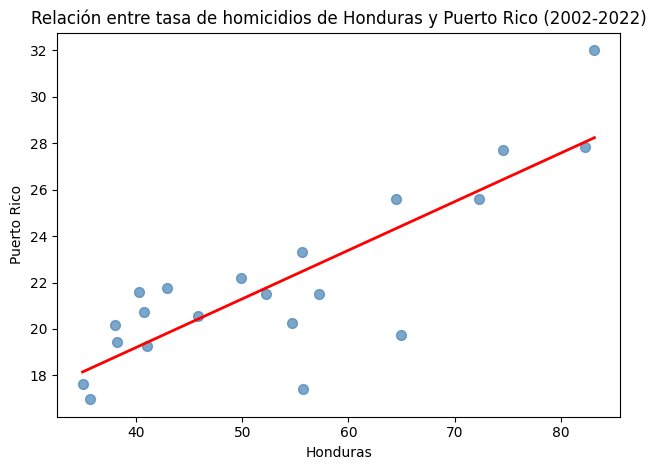

In [22]:
sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Puerto Rico',
            scatter_kws={"s": 50, "alpha": 0.7, "color": "steelblue"},
            line_kws={"color": "red", "linewidth": 2},
            ci=None)

plt.title('Relación entre tasa de homicidios de Honduras y Puerto Rico (2002-2022)')
plt.xlabel('Honduras')
plt.ylabel('Puerto Rico')
plt.tight_layout()


plt.show()

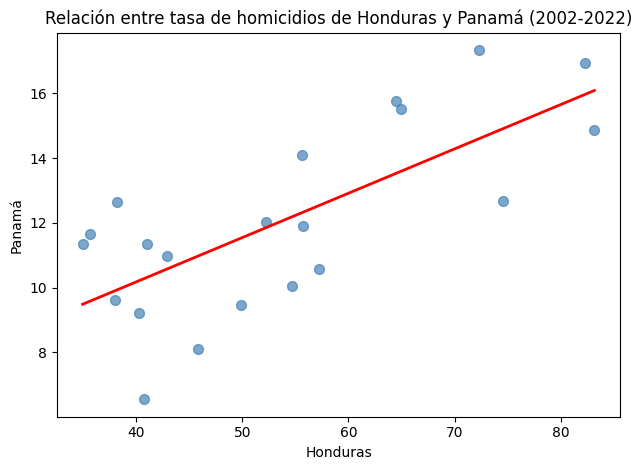

In [23]:
sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Panama',
            scatter_kws={"s": 50, "alpha": 0.7, "color": "steelblue"},
            line_kws={"color": "red", "linewidth": 2},
            ci=None)

plt.title('Relación entre tasa de homicidios de Honduras y Panamá (2002-2022)')
plt.xlabel('Honduras')
plt.ylabel('Panamá')
plt.tight_layout()


plt.show()

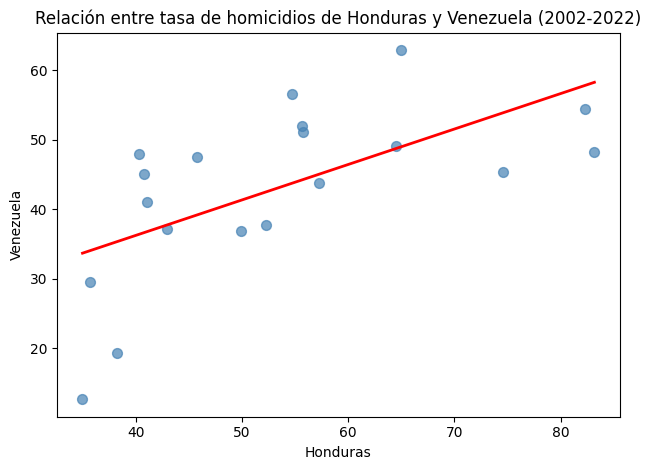

In [24]:
sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Venezuela (Bolivarian Republic of)',
            scatter_kws={"s": 50, "alpha": 0.7, "color": "steelblue"},
            line_kws={"color": "red", "linewidth": 2},
            ci=None)

plt.title('Relación entre tasa de homicidios de Honduras y Venezuela (2002-2022)')
plt.xlabel('Honduras')
plt.ylabel('Venezuela')
plt.tight_layout()

plt.show()

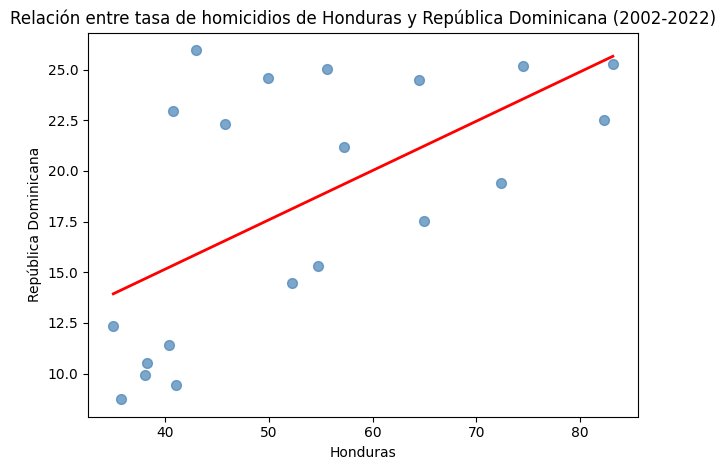

In [25]:
sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Dominican Republic',
            scatter_kws={"s": 50, "alpha": 0.7, "color": "steelblue"},
            line_kws={"color": "red", "linewidth": 2},
            ci=None)

plt.title('Relación entre tasa de homicidios de Honduras y República Dominicana (2002-2022)')
plt.xlabel('Honduras')
plt.ylabel('República Dominicana')
plt.tight_layout()

plt.show()

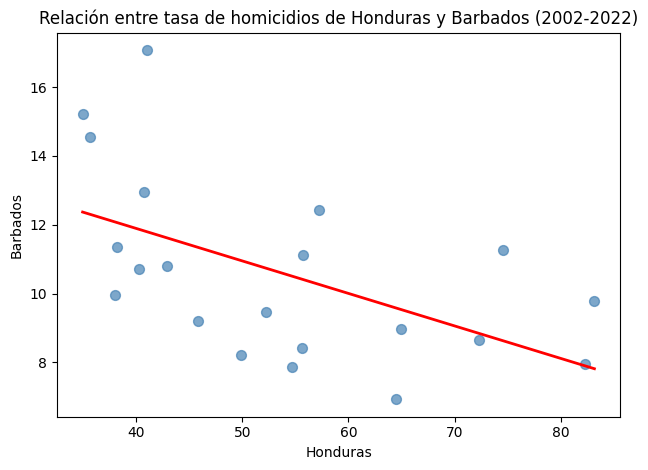

In [26]:
sns.regplot(data=dispersion,
            x='Honduras',
            y='Barbados',
            scatter_kws={"s": 50, "alpha": 0.7, "color": "steelblue"},
            line_kws={"color": "red", "linewidth": 2},
            ci=None)

plt.title('Relación entre tasa de homicidios de Honduras y Barbados (2002-2022)')
plt.xlabel('Honduras')
plt.ylabel('Barbados')
plt.tight_layout()

plt.show()

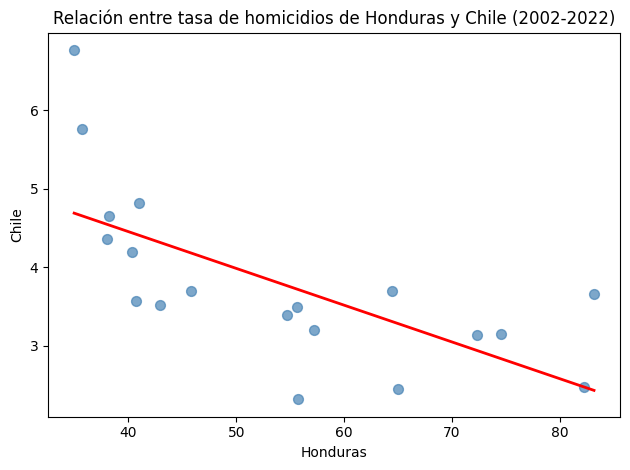

In [27]:
sns.regplot(data=dispersion,
            x='Honduras',
            y='Chile',
            scatter_kws={"s": 50, "alpha": 0.7, "color": "steelblue"},
            line_kws={"color": "red", "linewidth": 2},
            ci=None)

plt.title('Relación entre tasa de homicidios de Honduras y Chile (2002-2022)')
plt.xlabel('Honduras')
plt.ylabel('Chile')
plt.tight_layout()

plt.show()